Run cells in the following notebook to save off dataframe before running this notebook: `~/code/ontogeny/notebooks/exploration/win/old-age-cleanup/2023-09-01-cleanup-old-age.ipynb`

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend

In [17]:
c = PlotConfig()
format_plots()
saver = save_factory(c.save_path / "network-optim", tight_layout=False)

In [3]:
def age_map(age):
    if '12mo' in age:
        return 12 * 30 / 7
    if '18mo' in age:
        return 18 * 30 / 7
    if '22m' in age:
        return 22 * 30 / 7
    if '6m' in age:
        return 6 * 30 / 7
    if '9mo' in age:
        return 9 * 30 / 7
    if '3m' in age:
        return 3 * 30 / 7
    if '3w' in age:
        return 3
    if '5w' in age:
        return 5
    if '7w' in age:
        return 7
    if '9w' in age:
        return 9
    if '90w' in age:
        return 90

In [39]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/metadata/dynamics-correlations.parquet')
df = df[~df['session_name'].str.contains("CRL")].copy()

In [40]:
df['avg'] = df[['width', 'length', 'height']].mean(1)
df['age'] = df['session_name'].map(age_map).astype('int')

In [48]:
df.groupby('age')['avg'].count()

age
3     16
5     16
7     16
9     16
12    27
25    24
38    16
51    26
77    27
90    16
Name: avg, dtype: int64

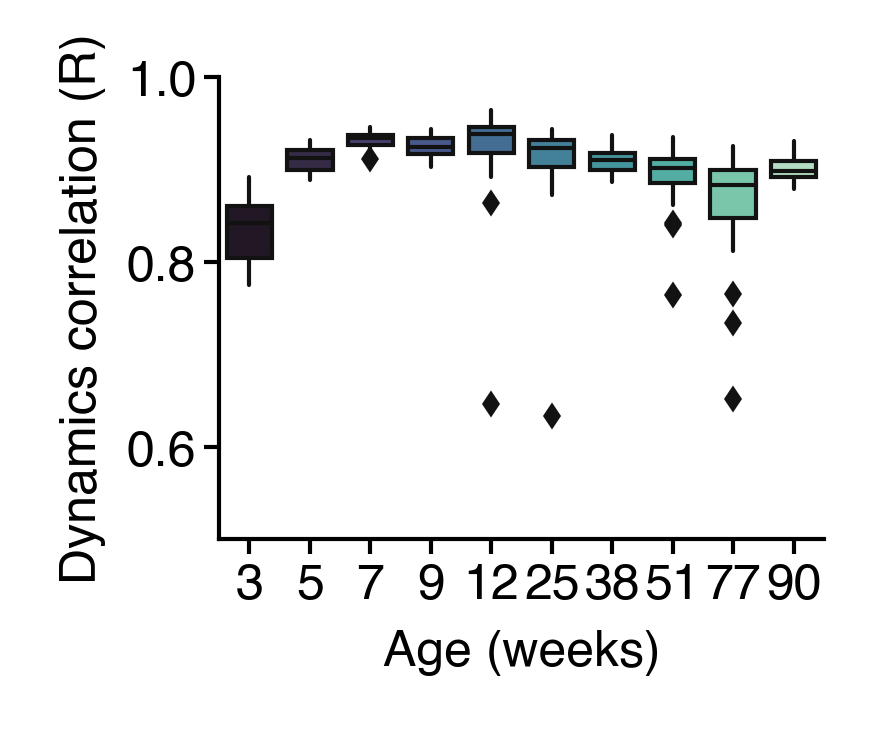

In [41]:
fig = figure(1.3, 1)
ax = sns.boxplot(
    data=df,
    x="age",
    y="avg",
    palette="mako",
    fliersize=1,
    linewidth=0.5,
    showcaps=False,
    width=0.75,
)
ax.set(ylim=(0.5, 1), xlabel="Age (weeks)", ylabel="Dynamics correlation (R)")
sns.despine()
saver(fig, "dynamics-correlation-vs-age-boxplot");

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


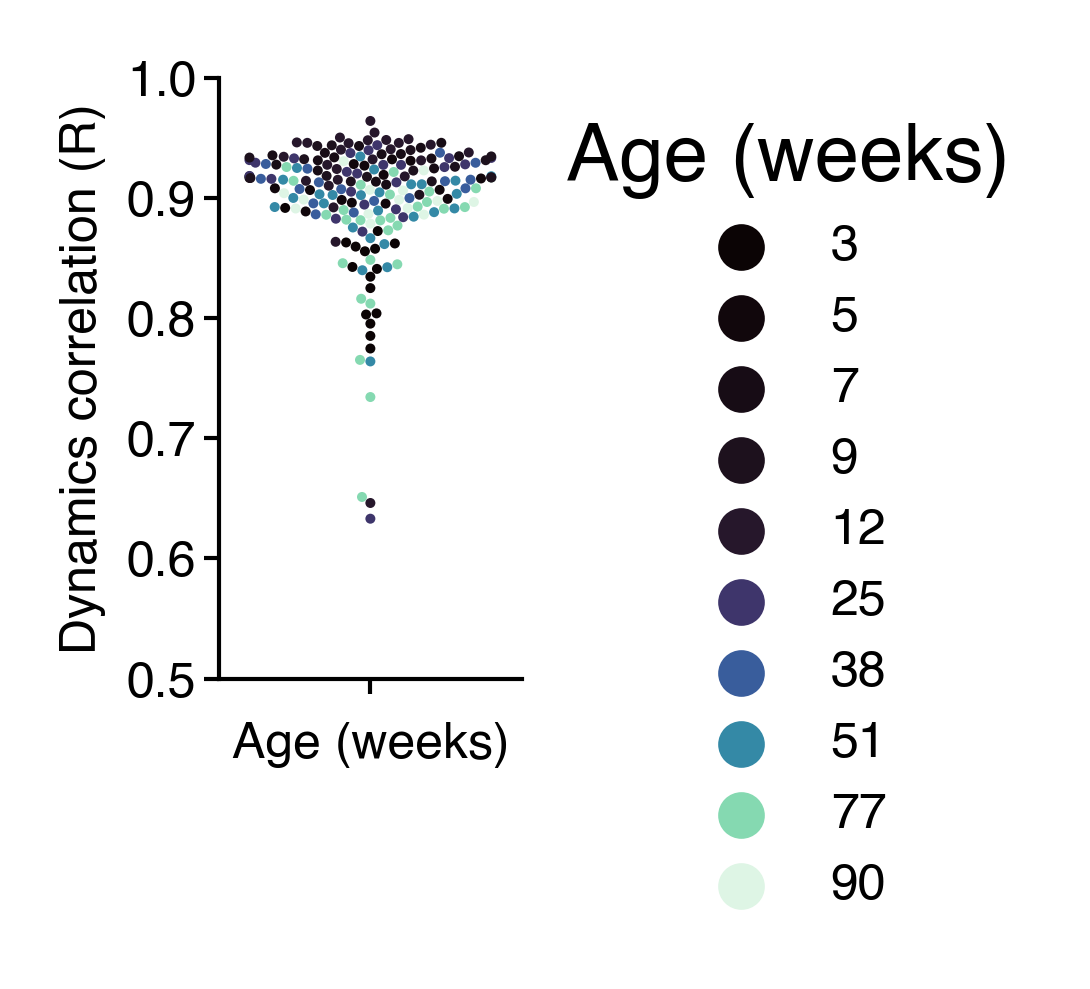

In [53]:
fig = figure(0.65, 1.3)
ax = sns.swarmplot(
    data=df,
    y="avg",
    hue='age',
    palette="mako",
    size=1.2,
    legend='full',
)
ax.set(ylim=(0.5, 1), xlabel="Age (weeks)", ylabel="Dynamics correlation (R)")
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "dynamics-correlation-vs-age-swarmplot");

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


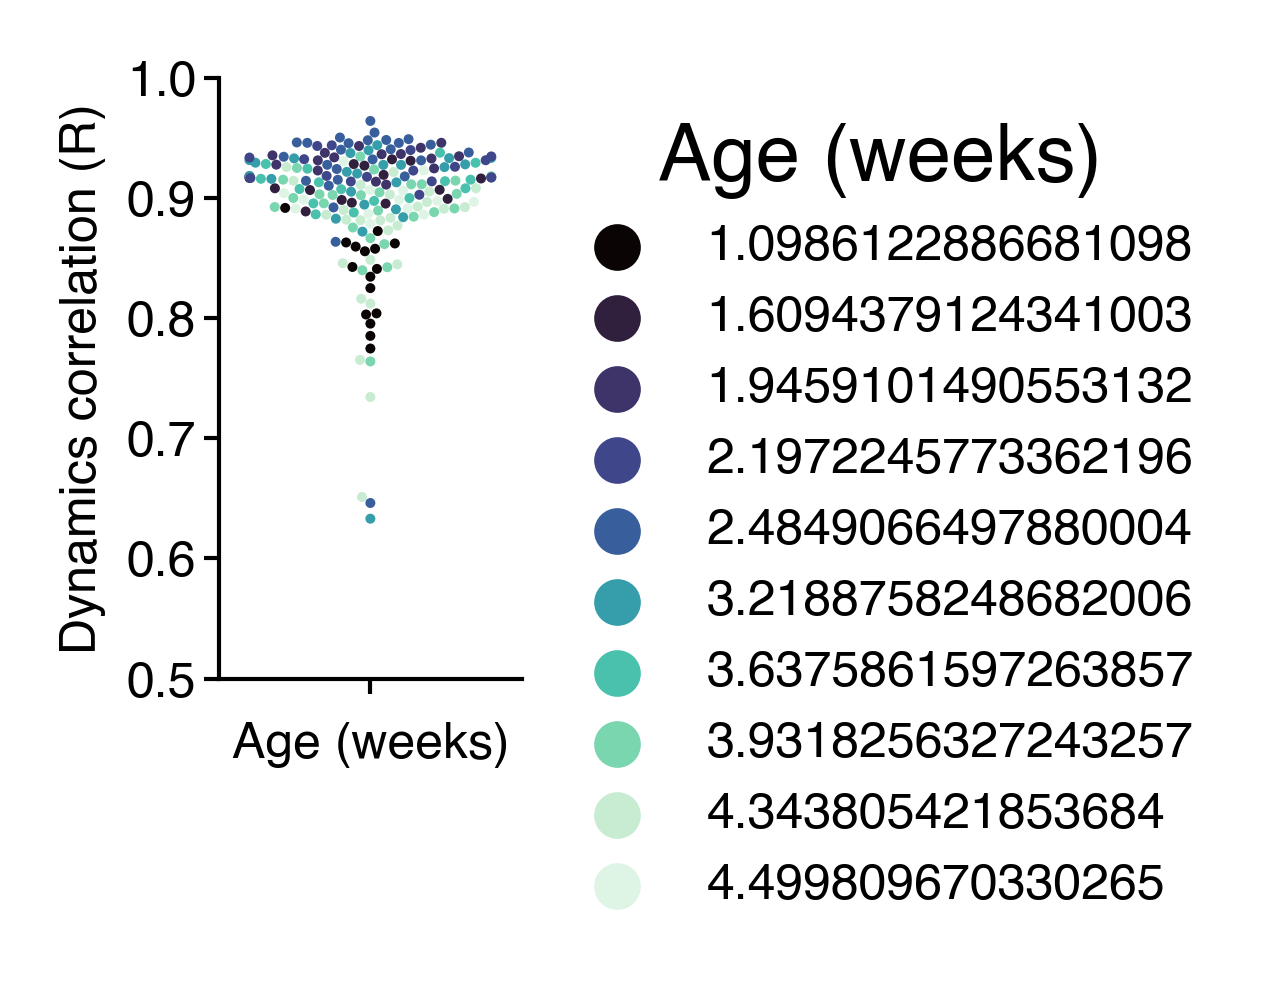

In [56]:
fig = figure(0.65, 1.3)
df["log_age"] = np.log(df["age"])
ax = sns.swarmplot(
    data=df,
    y="avg",
    hue="log_age",
    palette="mako",
    size=1.2,
    legend="full",
)
ax.set(ylim=(0.5, 1), xlabel="Age (weeks)", ylabel="Dynamics correlation (R)")
legend(ax, title="Age (weeks)")
sns.despine()
saver(fig, "dynamics-correlation-vs-log_age-swarmplot");